In [1]:
#import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bankloans.csv')
data.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0
699,37,1,12,14,44,14.7,2.994684,3.473316,0


# Performing EDA

<Axes: >

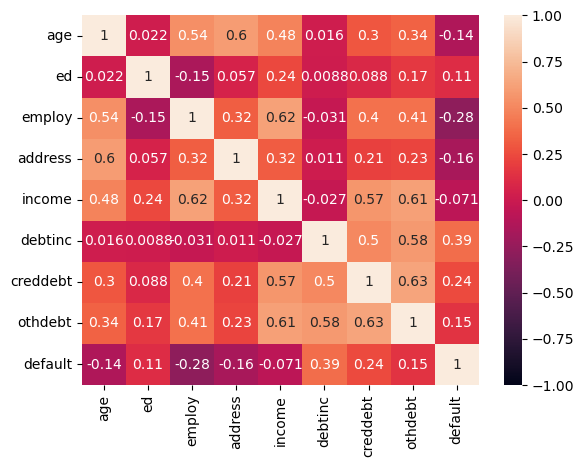

In [3]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

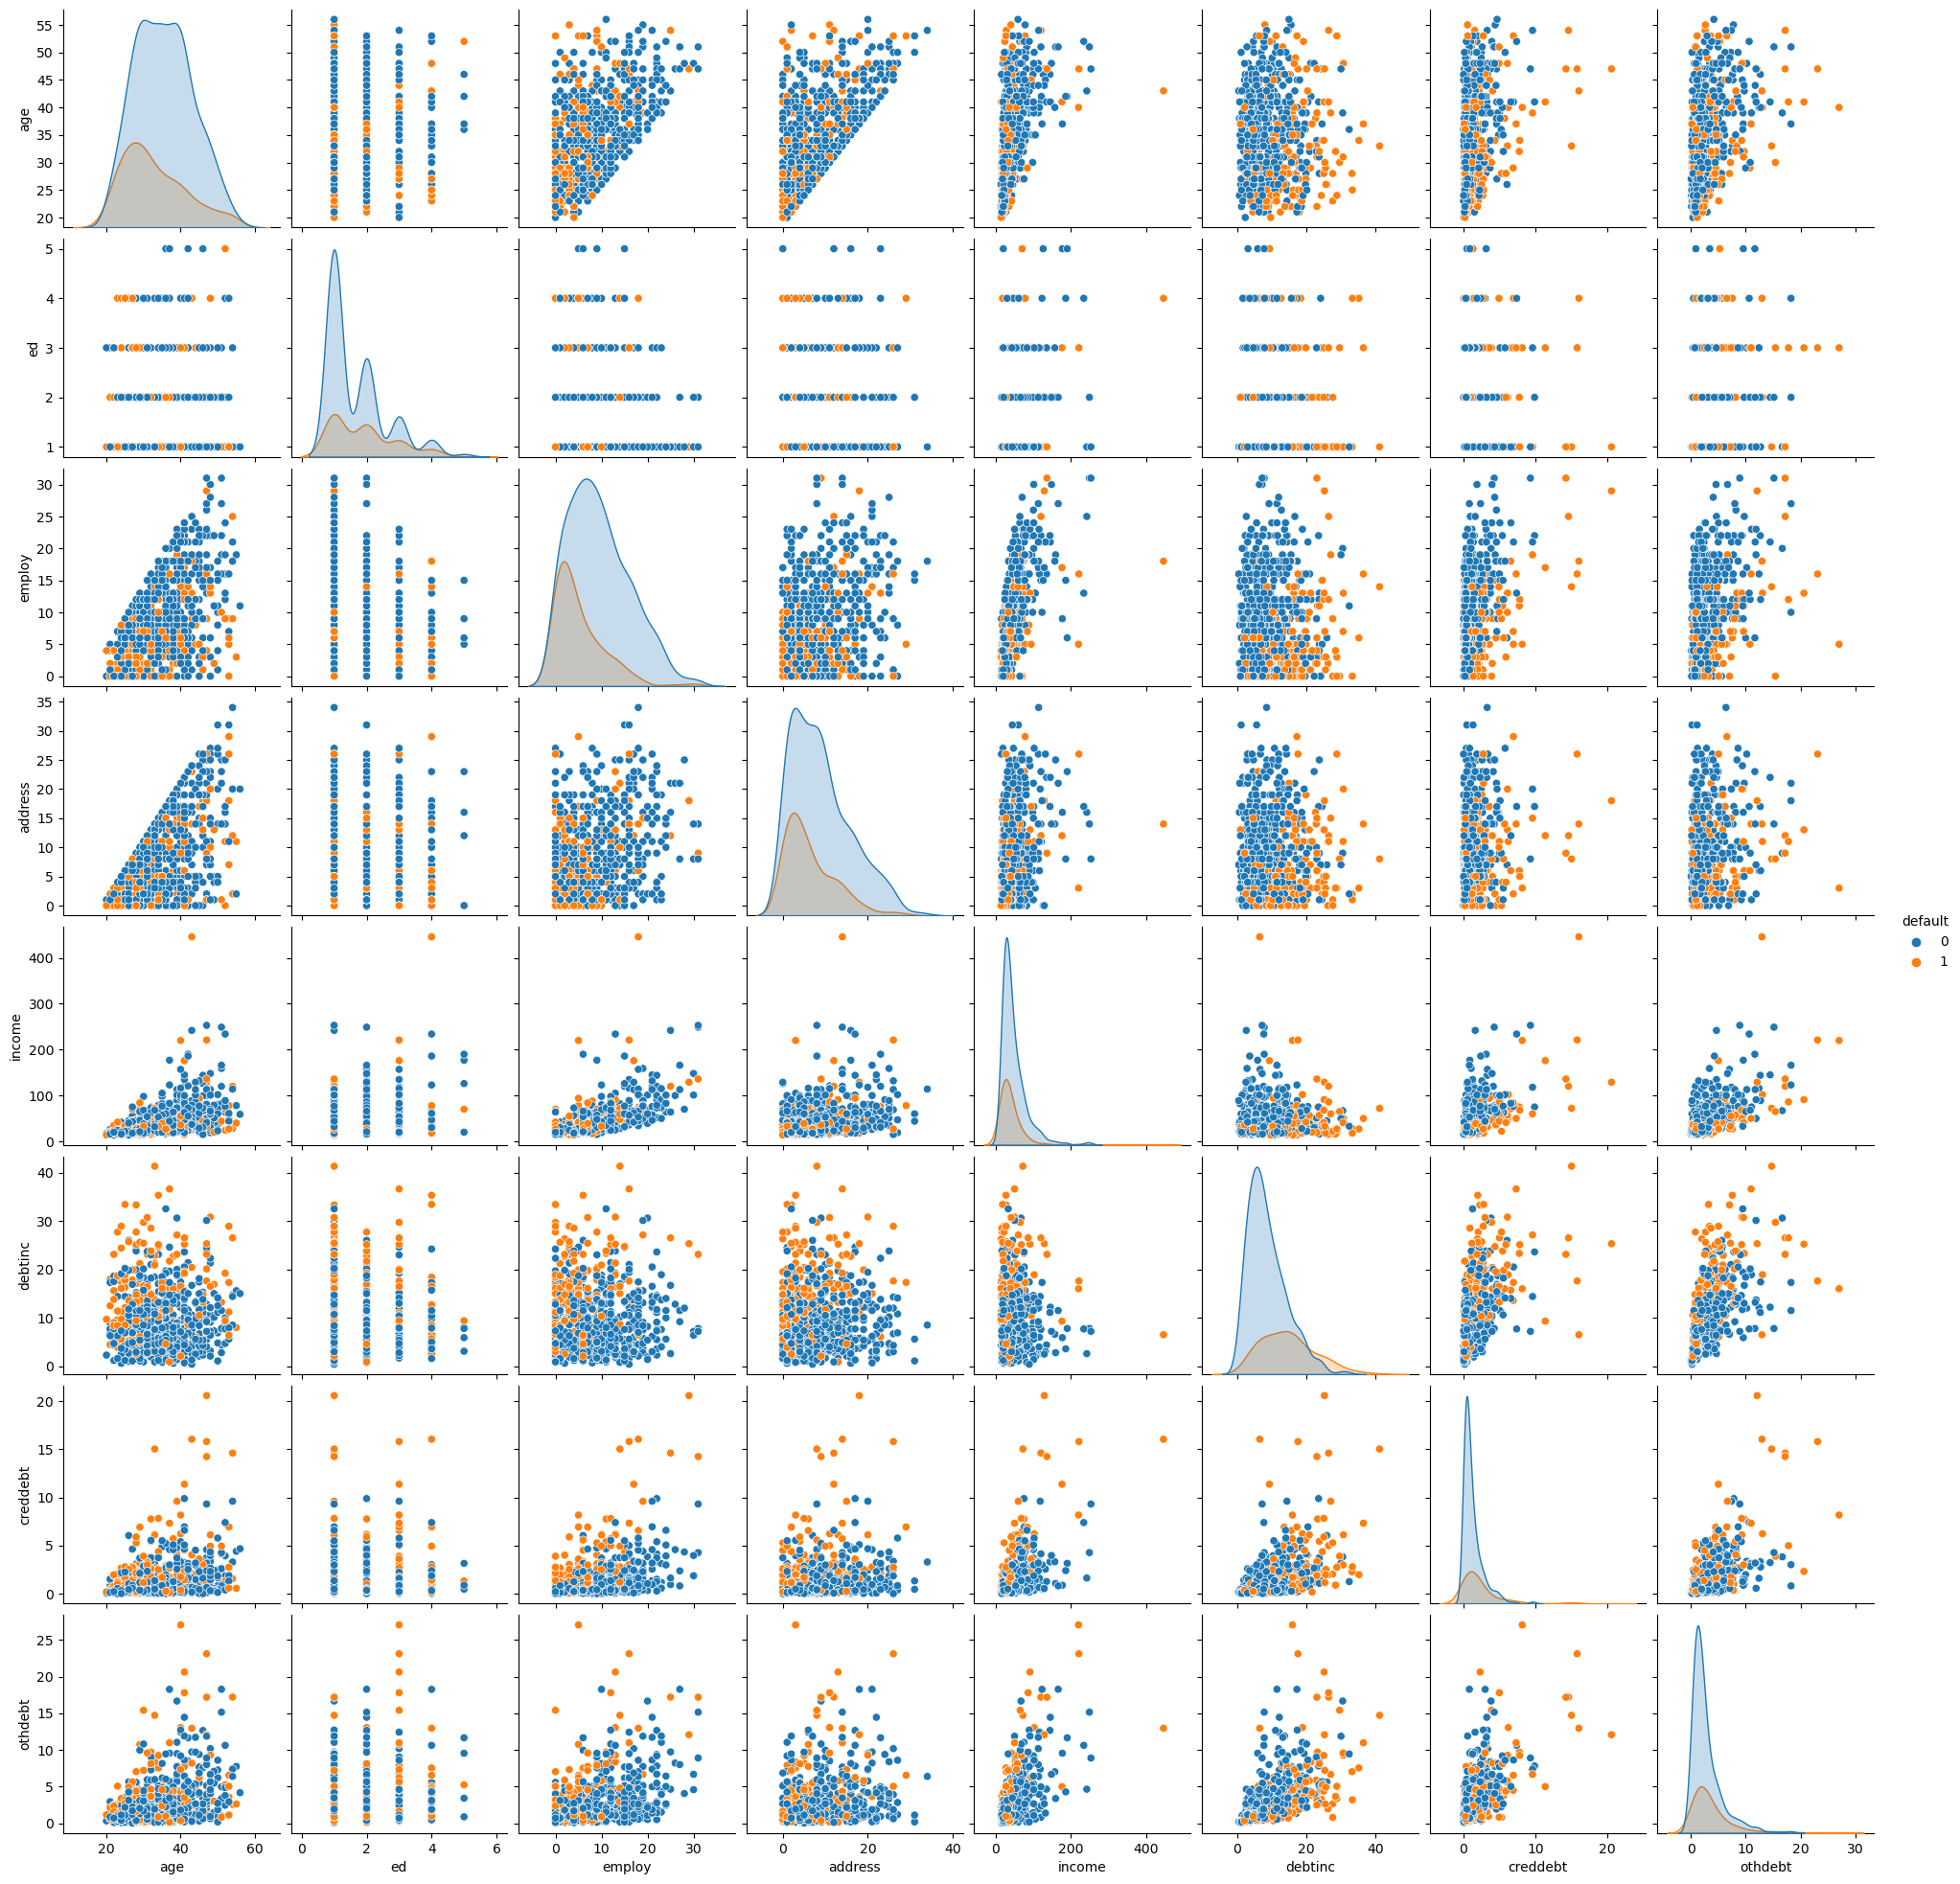

In [5]:
sns.pairplot(data,hue='default')

# Naive Bayes model with Bank dataset

In [6]:
x=data.iloc[:,:-1]
x.head(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798


In [7]:
y=data.iloc[:,-1:]
y.head(2)

,default
0,1
1,0


In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2)

In [9]:
xtrain.shape

(560, 8)

In [10]:
ytrain.shape

(560, 1)

In [11]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training completed....')
print()
ypred_gauss=gauss_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('Accuracy score: ',accuracy_score(ytest,ypred_gauss))
print()
print('='*60)
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_gauss))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_gauss))
print('='*60)

Training completed....

Testing is done
Accuracy score:  0.75

Confusion Matrix: 
 [[95  6]
 [29 10]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.77      0.94      0.84       101
           1       0.62      0.26      0.36        39

    accuracy                           0.75       140
   macro avg       0.70      0.60      0.60       140
weighted avg       0.73      0.75      0.71       140



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

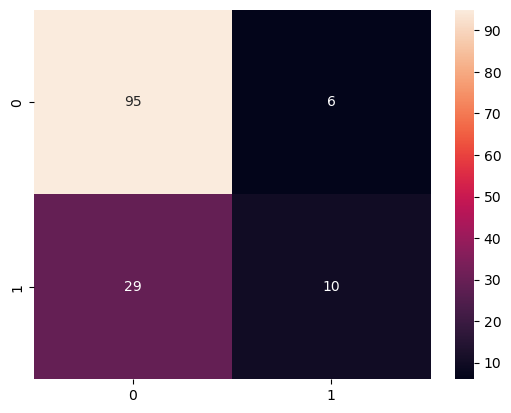

In [13]:
sns.heatmap(confusion_matrix(ytest,ypred_gauss),annot=True)

In [14]:
from sklearn.naive_bayes import MultinomialNB
multi_nb=MultinomialNB()
multi_nb.fit(xtrain,ytrain)
print('Training completed....')
print()
ypred_mul=multi_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_mul= accuracy_score(ytest,ypred_mul)
print('Accuracy score: ',accuracy_score(ytest,ypred_mul))
print()
print('='*60)
print()
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_mul))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_mul))
print('='*60)

Training completed....

Testing is done
Accuracy score:  0.7571428571428571


Confusion Matrix: 
 [[78 23]
 [11 28]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       101
           1       0.55      0.72      0.62        39

    accuracy                           0.76       140
   macro avg       0.71      0.75      0.72       140
weighted avg       0.79      0.76      0.77       140



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training completed.....')
print()
ypred_ber=ber_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_ber=accuracy_score(ytest,ypred_ber)
print('Accuracy score: ',accuracy_score(ytest,ypred_ber))
print()
print('='*60)
print()
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_ber))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_ber))
print('='*60)

Training completed.....

Testing is done
Accuracy score:  0.7214285714285714


Confusion Matrix: 
 [[101   0]
 [ 39   0]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       101
           1       0.00      0.00      0.00        39

    accuracy                           0.72       140
   macro avg       0.36      0.50      0.42       140
weighted avg       0.52      0.72      0.60       140



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

<Axes: >

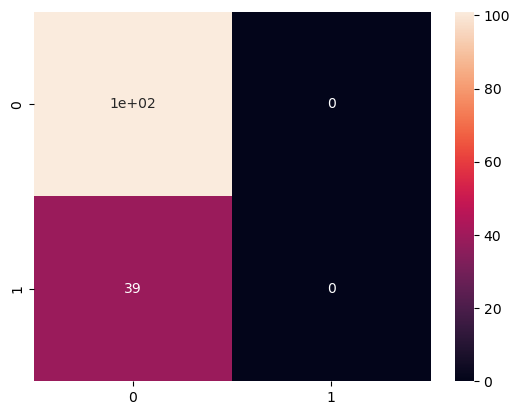

In [17]:
sns.heatmap(confusion_matrix(ytest,ypred_ber),annot=True)

In [18]:
print(gauss_nb,accuracy_gauss)
print(multi_nb,accuracy_mul)
print(ber_nb,accuracy_ber)

GaussianNB() 0.75
MultinomialNB() 0.7571428571428571
BernoulliNB() 0.7214285714285714


In [19]:
data.shape

(700, 9)

# Ensemble Model

# 1.Bagging Classifier

In [20]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bagc= BaggingClassifier(base_estimator=gauss_nb, n_estimators=10 , random_state=1)#Instantiate Bagging classifier

bagc.fit(xtrain,ytrain)#train the model

#Test the model
ypred_bagc= bagc.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy score:\n',accuracy_bagc)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_bagc))

****************************************************************************************************
Confusion matrix:
 [[94  7]
 [29 10]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.7428571428571429
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       101
           1       0.59      0.26      0.36        39

    accuracy                           0.74       140
   macro avg       0.68      0.59      0.60       140
weighted avg       0.72      0.74      0.70       140



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2.Random forest

In [21]:
#Bagging Classifier
from sklearn.ensemble import RandomForestClassifier
ran_for=RandomForestClassifier(n_estimators=10,random_state=2)
ran_for.fit(xtrain,ytrain)#train the model

#Test the model
ypred_rand= bagc.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy score:\n',accuracy_rand)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_rand))

****************************************************************************************************
Confusion matrix:
 [[94  7]
 [29 10]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.7428571428571429
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       101
           1       0.59      0.26      0.36        39

    accuracy                           0.74       140
   macro avg       0.68      0.59      0.60       140
weighted avg       0.72      0.74      0.70       140



C:\Users\ASUS\AppData\Local\Temp\ipykernel_2068\127151821.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for.fit(xtrain,ytrain)#train the model


In [22]:
#Bagging Classifier
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier(n_estimators=10,random_state=2)
extra.fit(xtrain,ytrain)#train the model

#Test the model
ypred_extra= extra.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy score:\n',accuracy_extra)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_extra))

****************************************************************************************************
Confusion matrix:
 [[94  7]
 [28 11]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.75
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       101
           1       0.61      0.28      0.39        39

    accuracy                           0.75       140
   macro avg       0.69      0.61      0.61       140
weighted avg       0.73      0.75      0.72       140



C:\Users\ASUS\AppData\Local\Temp\ipykernel_2068\111450896.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra.fit(xtrain,ytrain)#train the model


In [23]:
scores=[('Gaussian_NB', accuracy_gauss)
      ,('Multinomial_NB',accuracy_mul),
      ('Bernoulli_B',accuracy_ber)
      ,('Bagging_class',accuracy_bagc)
      ,('Random_forest_class',accuracy_rand)
      ,('ExtraTree_class',accuracy_extra)]

Acc_scores = pd.DataFrame(scores,columns=['Model','Accuracy_scores'])
print(Acc_scores.sort_values(by='Accuracy_scores',ascending=False))

                 Model  Accuracy_scores
1       Multinomial_NB         0.757143
0          Gaussian_NB         0.750000
5      ExtraTree_class         0.750000
3        Bagging_class         0.742857
4  Random_forest_class         0.742857
2          Bernoulli_B         0.721429


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_B'),
  Text(3, 0, 'Bagging_class'),
  Text(4, 0, 'Random_forest_class'),
  Text(5, 0, 'ExtraTree_class')])

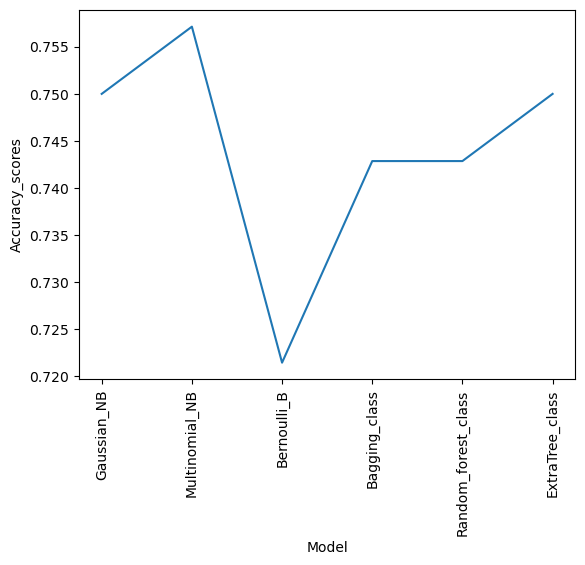

In [29]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_scores'] , data=Acc_scores)
plt.xticks(rotation=90)